In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# # Import data
# from google.colab import drive
# drive.mount('/content/drive')

# # All Data
# file_path1 = '/content/drive/MyDrive/Machine Learning/Project/Correct_MPP_Data_Combined.xlsx'
# df_all = pd.read_excel(file_path1)
# # Drop data and time column
# df_all = df_all.drop(['Date', 'Time'], axis=1)

# Option 2: Downloaded Files
df_all = pd.read_excel('Correct_MPP_Data_Combined.xlsx')
df_all = df_all.drop(['Date', 'Time'], axis=1)

In [36]:
print(df_all.head())

   Energy  poa_direct  Wind Speed  Temperature  Azimuth  Hour
0     0.0         0.0         0.5         -1.1       90     0
1     0.0         0.0         0.5         -1.1       90     1
2     0.0         0.0         0.5         -1.0       90     2
3     0.0         0.0         0.5         -1.0       90     3
4     0.0         0.0         0.6         -1.3       90     4


In [37]:
# Split into features and target
X = df_all.drop('Energy', axis=1)
y = df_all['Energy']

In [38]:
# Shape
print(X.shape)

(26280, 5)


# EDA of Combined Data

In [39]:
df_all.describe()

,Energy,poa_direct,Wind Speed,Temperature,Azimuth,Hour
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.00000,26280.000000
mean,15.192944,51.290339,0.252797,9.295776,180.00000,11.500000
std,40.452428,135.609269,0.364810,11.294354,73.48609,6.922318
min,0.000000,0.000000,0.000000,-26.300000,90.00000,0.000000
25%,0.000000,0.000000,0.000000,0.600000,90.00000,5.750000
50%,0.000000,0.000000,0.000000,9.600000,180.00000,11.500000
75%,0.236368,1.345271,0.400000,18.800000,270.00000,17.250000
max,262.021195,829.072030,2.400000,34.300000,270.00000,23.000000


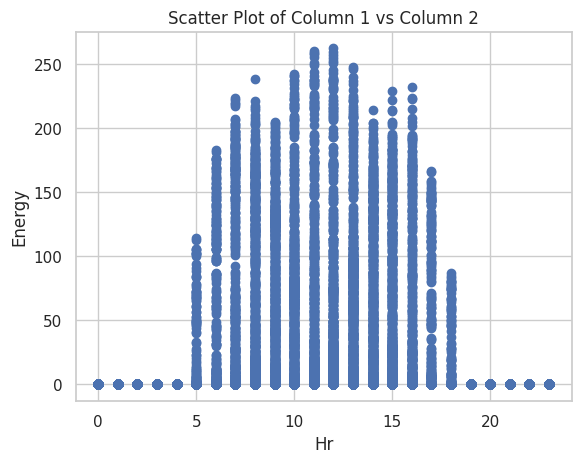

In [40]:
plt.scatter(df_all['Hour'], df_all['Energy'])  # Replace 'column1', 'column2'
plt.xlabel('Hr')
plt.ylabel('Energy')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.show()

In [41]:
# Convert to numeric
df_numeric = df_all.select_dtypes(include=['number'])  # Select only numerical columns


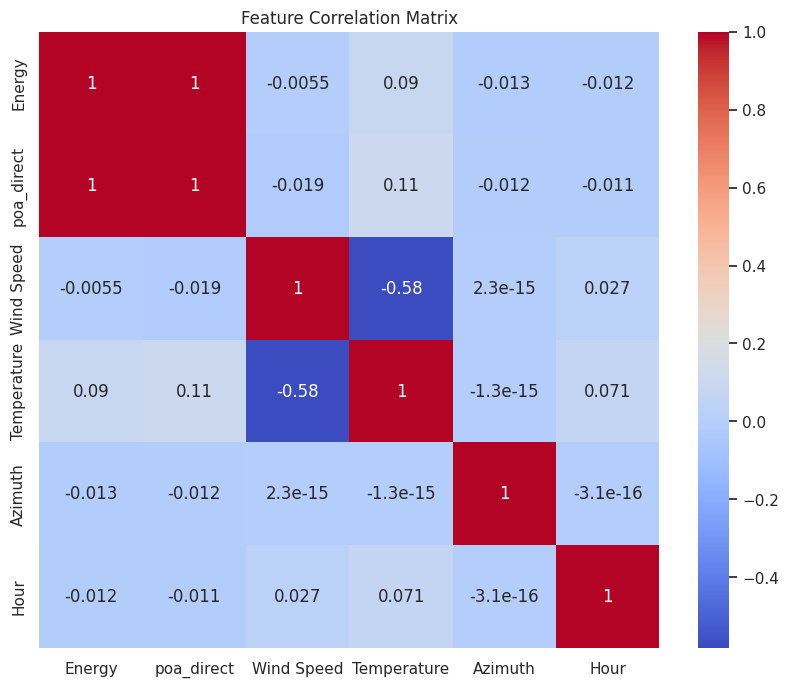

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_all.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


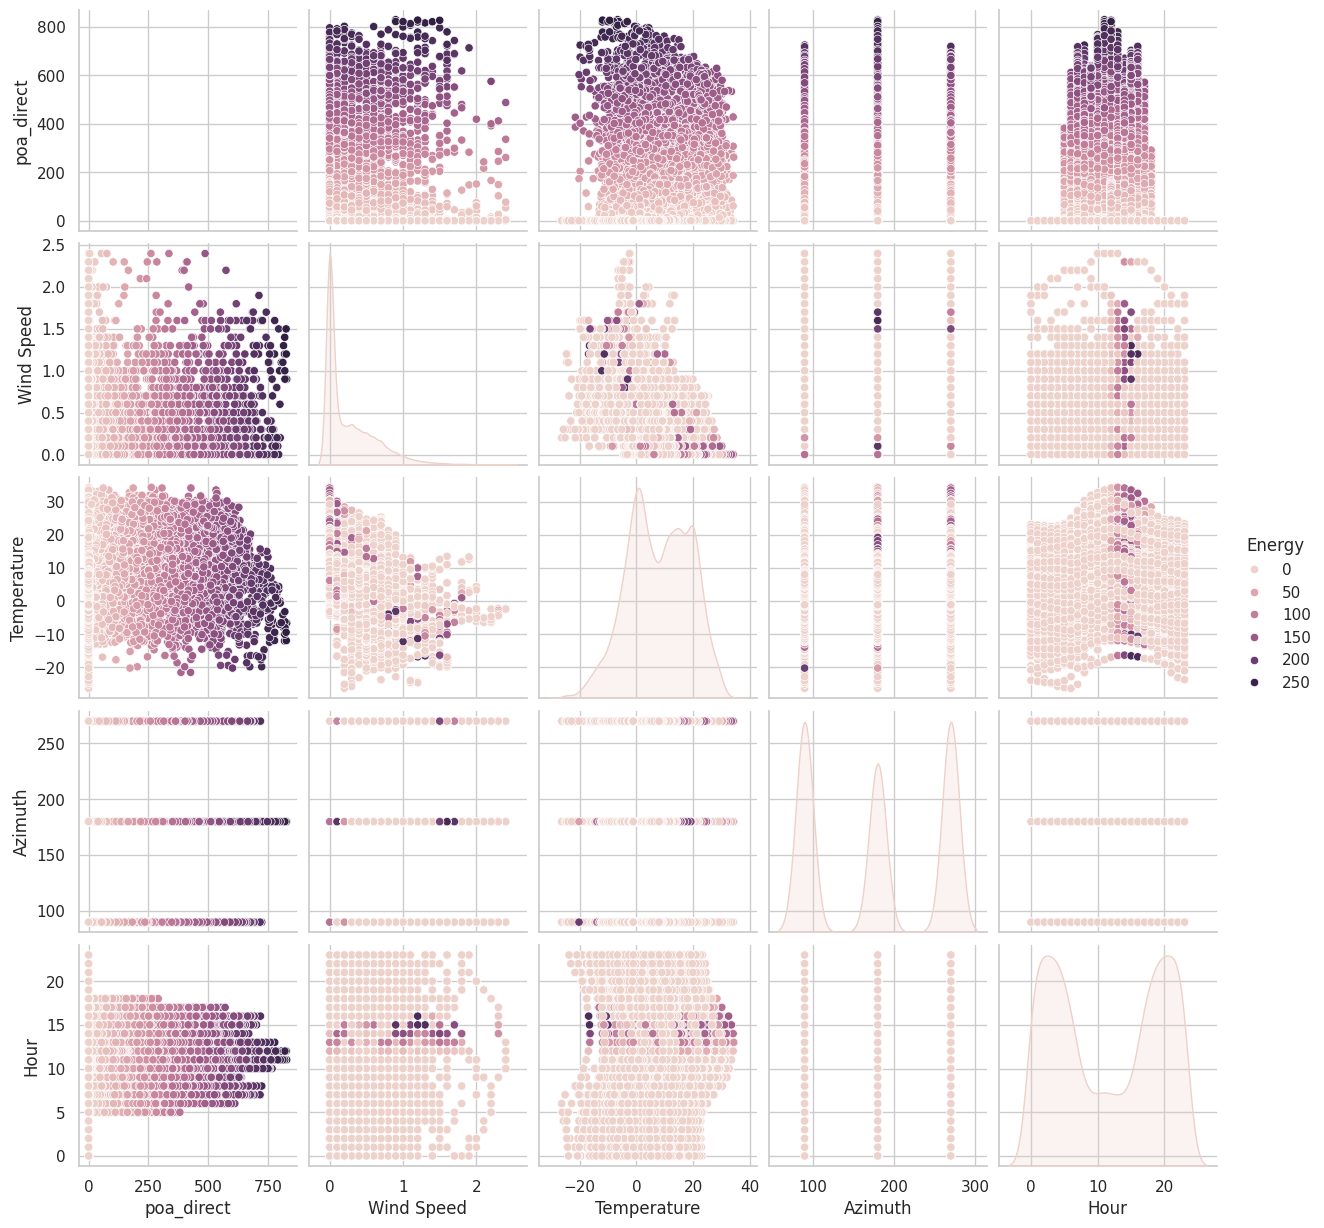

In [43]:
sns.pairplot(df_all, hue='Energy')

In [44]:
# Check data types of all columns
print(df_all.dtypes)

# Inspect the 'Temperature' column for non-numeric values, especially around row 1858
print(df_all['Temperature'].iloc[1855:1865])  # Check rows near position 1858

Energy         float64
poa_direct     float64
Wind Speed     float64
Temperature    float64
Azimuth          int64
Hour             int64
dtype: object
1855   -6.9
1856   -3.6
1857   -1.8
1858   -0.9
1859   -0.2
1860    0.3
1861    0.5
1862    0.5
1863    0.3
1864   -0.2
Name: Temperature, dtype: float64


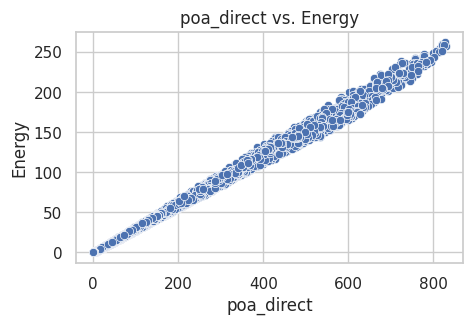

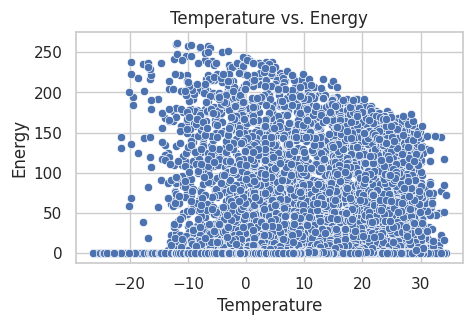

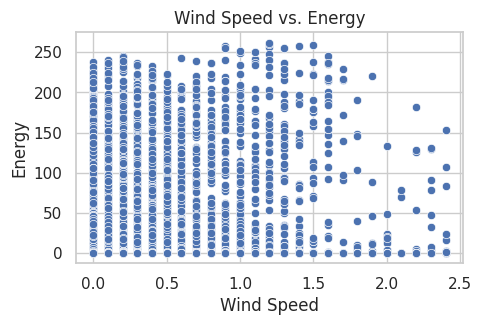

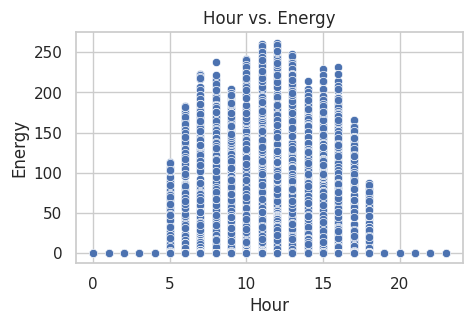

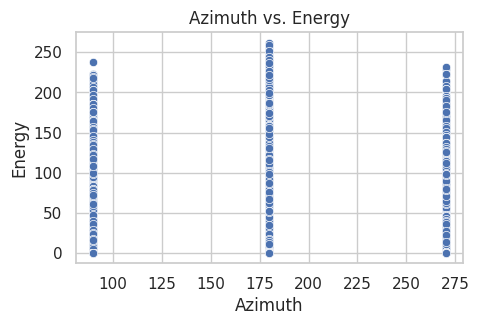

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['poa_direct', 'Temperature', 'Wind Speed', 'Hour', 'Azimuth']

# Iterate through features and create individual plots
for feature in features:
    plt.figure(figsize=(5, 3))  # Create a new figure for each plot
    sns.scatterplot(data=df_all, x=feature, y='Energy')
    plt.title(f'{feature} vs. Energy')
    plt.xlabel(feature)
    plt.ylabel('Energy')
    plt.show()  # Display each plot separately

# Training and Testing models (move to separate files)

In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_all.drop('Energy', axis=1)  # All columns except 'Energy'
y = df_all['Energy']  # Target variable 'Energy'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21024, 5)
(5256, 5)
(21024,)
(5256,)


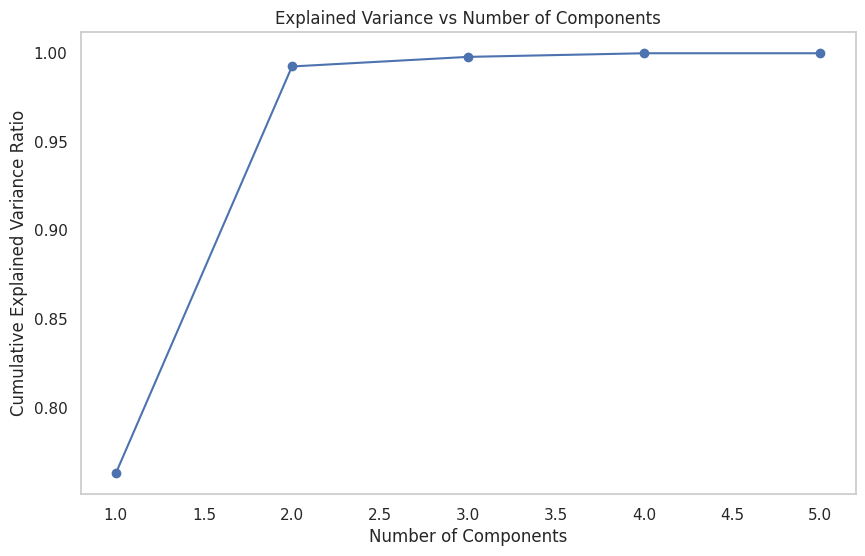

In [48]:
# Combo
# Create explained variance ratio plot to visulaize data (check lecture week 9 - pg 52)
from sklearn.decomposition import PCA

n_components = X_test.shape[1]  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_test)

explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

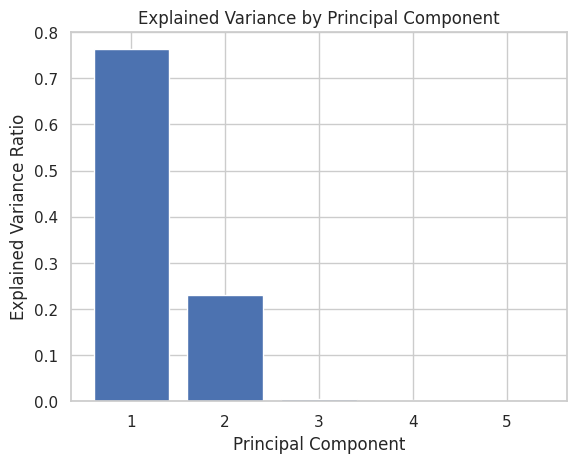

In [49]:
plt.bar(range(1, n_components + 1), explained_variance_ratios)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

In [50]:
# Add Combined Data again for conversion
# All Data
#file_path = '/content/drive/MyDrive/Machine Learning/Project/Correct_MPP_Data_Combined.xlsx'
#df_all_pl = pd.read_excel(file_path)

df_all_pl = pd.read_excel('Correct_MPP_Data_Combined.xlsx')
# Split into features and target
X_pl = df_all_pl.drop('Energy', axis=1)
y_pl = df_all_pl['Energy']

# Split data
X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(X_pl, y_pl, test_size=0.2, random_state=42)

In [51]:
df_all_pl.head()

,Date,Time,Energy,poa_direct,Wind Speed,Temperature,Azimuth,Hour
0,2022-01-01 00:00:00.000,00:30:00,0.0,0.0,0.5,-1.1,90,0
1,2022-01-01 01:00:00.288,01:30:00,0.0,0.0,0.5,-1.1,90,1
2,2022-01-01 01:59:59.712,02:30:00,0.0,0.0,0.5,-1.0,90,2
3,2022-01-01 03:00:00.000,03:30:00,0.0,0.0,0.5,-1.0,90,3
4,2022-01-01 04:00:00.288,04:30:00,0.0,0.0,0.6,-1.3,90,4


In [52]:
X_train_pl.head()

,Date,Time,poa_direct,Wind Speed,Temperature,Azimuth,Hour
20429,2022-05-02 04:59:59.712,1900-04-30 05:30:00.003000,0.000000,0.3,9.2,270,5
7029,2022-10-20 21:00:00.000,1900-10-18 21:29:59.997000,0.000000,0.0,9.8,90,21
24539,2022-10-20 10:59:59.712,1900-10-18 11:30:00.003000,0.000000,0.0,19.2,270,11
12586,2022-06-09 10:00:00.288,1900-06-07 10:30:00,21.388752,0.0,20.6,180,10
4550,2022-07-09 13:59:59.712,1900-07-07 14:30:00.003000,0.000000,0.0,25.3,90,14


In [57]:
# Convert values
# Convert date column to datetime if not already
X_train_pl['Date'] = pd.to_datetime(X_train_pl['Date'])
X_test_pl['Date'] = pd.to_datetime(X_test_pl['Date'])

# Extract month names and hour
X_train_pl['Month'] = X_train_pl['Date'].dt.month_name()
X_test_pl['Month'] = X_test_pl['Date'].dt.month_name()

# Raw data
plot_df_all_pl = df_all_pl.copy()

In [55]:
X_train_pl.head()

,Date,Time,poa_direct,Wind Speed,Temperature,Azimuth,Hour,Month
20429,2022-05-02 04:59:59.712,1900-04-30 05:30:00.003000,0.000000,0.3,9.2,270,5,May
7029,2022-10-20 21:00:00.000,1900-10-18 21:29:59.997000,0.000000,0.0,9.8,90,21,October
24539,2022-10-20 10:59:59.712,1900-10-18 11:30:00.003000,0.000000,0.0,19.2,270,11,October
12586,2022-06-09 10:00:00.288,1900-06-07 10:30:00,21.388752,0.0,20.6,180,10,June
4550,2022-07-09 13:59:59.712,1900-07-07 14:30:00.003000,0.000000,0.0,25.3,90,14,July


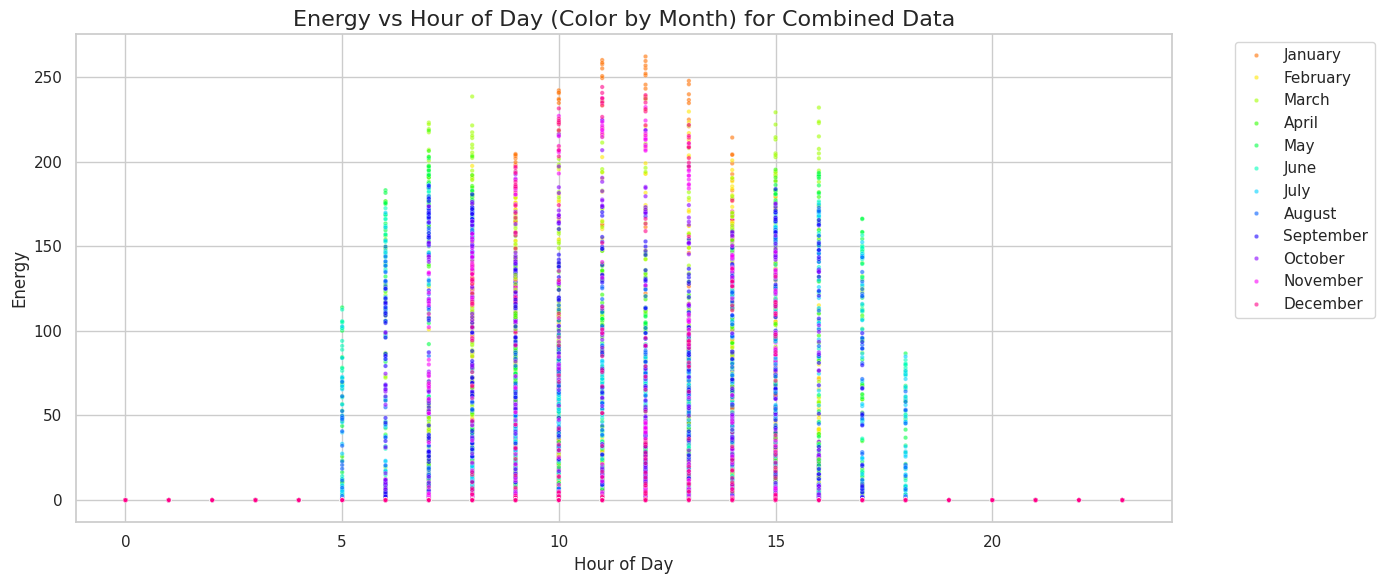

In [58]:
# Pallete plot - combined
import seaborn as sns
# Create the plot
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define a color palette by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# Assign Color Pallete
palette = sns.color_palette("hsv", 12)

# Create the 'Month' column in plot_df_all_pl if it doesn't exist
if 'Month' not in plot_df_all_pl.columns:
    plot_df_all_pl['Month'] = pd.to_datetime(plot_df_all_pl['Date']).dt.month_name()

# Create the plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=plot_df_all_pl, x="Hour", y="Energy", hue="Month",
                hue_order=month_order, palette=palette, s=10, alpha=0.6)

plt.title("Energy vs Hour of Day (Color by Month) for Combined Data", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
